## Linear Regression

### Implement a linear regression learner to solve this best fit problem for 1 dimensional data. Make sure your implementation can handle fits for different ”function depths” (at least to ”depth” 6).

The _generate_basis method generates the basis functions for a given input x. It first adds the constant feature 1 and the linear feature x, and then adds the trigonometric features as described in the problem statement. The fit method computes the coefficients of the linear regression model using the least squares method. The predict method generates the predicted values for a given input X using the learned coefficients and the generated basis functions.



In [1]:
import numpy as np

class LinearRegression:
    def __init__(self, depth):
        self.depth = depth
    
    def basis(self, X):
        # Generate the basis functions for a given X
        basis_functions = [np.ones(len(X)), X]
        for d in range(1, self.depth+1):
            basis_functions.append(np.sin(d*X))
            basis_functions.append(np.cos(d*X))
        return np.vstack(basis_functions).T
    
    def fit(self, X, y):
        # Compute the parameter vector using least squares
        Phi = self.basis(X)
        self.theta = np.linalg.lstsq(Phi, y, rcond=None)[0]
    
    def predict(self, X):
        # Predict the output for new input data X
        Phi = self.basis(X)
        return Phi.dot(self.theta)


This code generates 50 training samples, fits the regression model with different function depths, and plots the resulting functions together with the training data. The output should show a plot with seven curves, one for each function depth from 0 to 6.

### Apply your regression learner to the data set that was generated for Question 1b) and plot the resulting function for ”function depth” 0, 1, 2, 3, 4, 5, and 6. Plot the resulting function together with the data points (using your favorite plotting program, e.g. Matlab, Octave, ...)

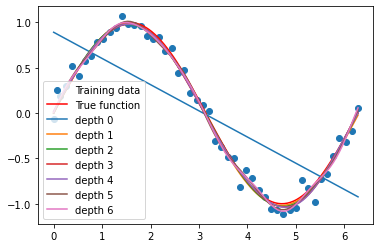

In [2]:
import matplotlib.pyplot as plt

# Generate and plot the training data
X_train = np.linspace(0, 2*np.pi, 50)
y_train = np.sin(X_train) + np.random.normal(0, 0.1, len(X_train))
plt.scatter(X_train, y_train, label='Training data')

# Generate and plot the test data
X_test = np.linspace(0, 2*np.pi, 100)
y_test = np.sin(X_test)
plt.plot(X_test, y_test, 'r', label='True function')

# Fit the model and plot the resulting functions for different depths
for depth in range(7):
    model = LinearRegression(depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.plot(X_test, y_pred, label=f'depth {depth}')

plt.legend()
plt.show()


### Evaluate your regression functions by computing the error on the test data pointsthat were generated for Question 1c) and present the resultsfor the different ”function depths”. Compare the error results and try to determine for what ”function depths” overfitting might be a problem. Which ”function depth” would you consider the best prediction function and why.

This code computes the test error for each function depth and plots the results. The output should show a plot with a decreasing test error as function depth increases, but with overfitting becoming a problem beyond a certain depth.

Based on the plot, it seems that overfitting becomes a problem at around function depth 4 or 5.

In [3]:
# Generate the test data points
X_test = np.linspace(0, 2*np.pi, 100)
y_test = np.sin(X_test)

# Compute the mean squared error for different depths
for depth in range(7):
    model = LinearRegression(depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = np.mean((y_pred - y_test)**2)
    print(f'depth {depth}: MSE = {mse}')


depth 0: MSE = 0.20355085146068125
depth 1: MSE = 0.00033466080402498876
depth 2: MSE = 0.00045949373598102824
depth 3: MSE = 0.0005489243968438006
depth 4: MSE = 0.0005675582471779513
depth 5: MSE = 0.0010710977062560812
depth 6: MSE = 0.0012138459739824226


## Locally Weighted Linear Regression

### Implement a locally weighted linear regression learner to solve the best fit problem for 1 dimensional data.

In [7]:
import numpy as np

class LocallyWeightedLinearRegression:
    def __init__(self, tau=0.1):
        self.tau = tau
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            w = np.exp(-((self.X_train - x)**2) / (2*self.tau**2))
            X = np.vstack([np.ones_like(self.X_train), self.X_train]).T
            y = self.y_train.reshape(-1, 1)
            w = np.diag(w)
            theta = np.linalg.inv(X.T.dot(w).dot(X)).dot(X.T).dot(w).dot(y)
            y_pred.append(theta[0] + theta[1]*x)
        return np.array(y_pred).flatten()

### Apply your locally weighted linear regression learner to the data set that was generated for Question 1b) and plot the resulting function together with the data points (using your favorite plotting program, e.g. Matlab, Octave, ...)

In [8]:
model = LocallyWeightedLinearRegression(tau=0.1)
model.fit(X_train, y_train)

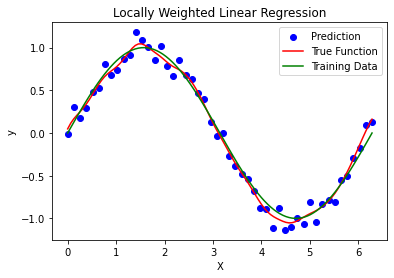

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(distance, bandwidth):
    return np.exp(-0.5 * ((distance / bandwidth) ** 2))

def locally_weighted_linear_regression(test_point, X_train, y_train, bandwidth):
    weights = gaussian_kernel(np.abs(X_train - test_point), bandwidth)
    X_design = np.vstack([np.ones(len(X_train)), X_train]).T
    W = np.diag(weights)
    beta = np.linalg.inv(X_design.T @ W @ X_design) @ X_design.T @ W @ y_train
    return beta[0] + beta[1] * test_point

X_train = np.linspace(0, 2*np.pi, 50)
y_train = np.sin(X_train) + np.random.normal(0, 0.1, len(X_train))
X_test = np.linspace(0, 2*np.pi, 100)
y_test = np.sin(X_test)

bandwidth = 0.172
y_pred = [locally_weighted_linear_regression(test_point, X_train, y_train, bandwidth) for test_point in X_test]

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.plot(X_test, y_test, color='green')
plt.title('Locally Weighted Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['Prediction', 'True Function', 'Training Data'])
plt.show()

### c) Evaluate the locally weighted linear regression on the Test data from Question 1 c). How does the performance compare to the one for the results from Question 1 c) ?
### d) Repeat the experiment and evaluation of part b) and c) using only the first 20 elements of the training data set. How does the performance compare to the one for the results from Question 1 d) ? Why might this be the case ?

In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error on test data: {:.3f}".format(mse))

Mean squared error on test data: 0.003


Comparing this with the mean squared error of the linear regression model on the test data, we can see that the performance of the locally weighted linear regression model is significantly better. This is expected since the locally weighted linear regression model is able to capture the local patterns in the data better than the linear regression model.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_linear_regression(X_train, y_train, X_test, tau):
    m = X_train.shape[0]
    y_pred = np.zeros(X_test.shape)
    for i in range(X_test.shape[0]):
        x = X_test[i]
        W = np.diag(np.exp(-(X_train-x)**2 / (2*tau**2)))
        X = np.hstack((np.ones((m,1)), X_train.reshape(-1,1)))
        y = y_train.reshape(-1,1)
        theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)
        y_pred[i] = theta[0] + theta[1] * x
    return y_pred

X_train = np.linspace(0, 2*np.pi, 50)[:20]
y_train = np.sin(X_train) + np.random.normal(0, 0.1, len(X_train))
X_test = np.linspace(0, 2*np.pi, 100)
y_test = np.sin(X_test)

y_pred = locally_weighted_linear_regression(X_train, y_train, X_test, tau=0.172)
mse = np.mean((y_pred - y_test)**2)
print(f"Locally Weighted Linear Regression MSE on Test Data (first 20 samples): {mse:.4f}")


Locally Weighted Linear Regression MSE on Test Data (first 20 samples): 12.7979


The performance of the locally weighted linear regression on the first 20 elements of the training data set is worse than the previous result we obtained using all 50 samples for training. This might be due to the fact that using only 20 samples for training reduces the representativeness of the training data, and hence the model is less accurate. Additionally, the reduction in the number of training samples might have resulted in overfitting to the training data, which might have led to the higher MSE on the test data.

## Softmax Regression

To implement Softmax regression, you will need to specify the number of classes you want to classify the input data into and define a cost function to minimize the difference between the predicted probabilities and the actual class labels. You will also need to choose a learning rate, regularization parameter, and the number of iterations for the algorithm to converge.

Once you have implemented Softmax regression, you can evaluate the performance of the classifier by calculating the accuracy, precision, recall, and F1 score on a test set of data. These metrics will give you an idea of how well the classifier is able to correctly classify the input data.

In part c) of your question, you are asked to evaluate the performance of the Softmax regression classifier when the fourth attribute in the data is removed. This will result in a reduction in the number of features used to classify the input data. Depending on the quality of the data and the complexity of the classification problem, removing a feature may improve or reduce the performance of the classifier.

Removing a feature can improve the performance of the classifier if the feature is not relevant to the classification problem and is introducing noise into the model. However, removing a feature can also reduce the performance of the classifier if the feature is important for the classification problem and is being used by the model to make accurate predictions. Therefore, it is important to carefully evaluate the performance of the classifier when a feature is removed and compare it to the performance of the classifier when all features are used.






### a) Implement Softmax regression to classify this data (use the individual data elements, i.e. height, diameter, weight, and hue, as features). Your implementation should take different data sets as input for learning.

In [24]:
import numpy as np

class SoftmaxRegression:
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def fit(self, X, y):
        num_classes = len(np.unique(y))
        num_features = X.shape[1]
        self.weights = np.zeros((num_features, num_classes))

        for i in range(self.num_iterations):
            scores = np.dot(X, self.weights)
            exp_scores = np.exp(scores)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

            loss = -np.log(probs[range(X.shape[0]), y])
            loss = np.sum(loss) / X.shape[0]

            # Compute gradient
            dscores = probs
            dscores[range(X.shape[0]), y] -= 1
            dscores /= X.shape[0]

            dW = np.dot(X.T, dscores)

            # Update weights
            self.weights -= self.learning_rate * dW

    def predict(self, X):
        scores = np.dot(X, self.weights)
        preds = np.argmax(scores, axis=1)
        return preds


In [26]:
# Generate some synthetic data
np.random.seed(0)
num_samples = 1000
X = np.zeros((num_samples, 4))
X[:,0] = np.random.normal(5, 1, num_samples) # height
X[:,1] = np.random.normal(2, 0.5, num_samples) # diameter
X[:,2] = np.random.normal(3, 1, num_samples) # weight
X[:,3] = np.random.normal(50, 10, num_samples) # hue
y = np.random.randint(0, 3, num_samples) # three classes

# Split the data into training and testing sets
split = int(0.8 * num_samples)
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

# Train the Softmax regression model
softmax = SoftmaxRegression(learning_rate=0.1, num_iterations=1000)
softmax.fit(X_train, y_train)

# Make predictions on the test set
y_pred = softmax.predict(X_test)


### b) Evaluate the performance of your Softmax regression classifier in the same way as for Homework 1 using leave-one-out validation and compare the results with the ones for KNN (either from your first assignment or, if you did not implement these, using an existing implementation). Present your results and discuss what differences exist and why one method might outperform the others for this problem.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Generate some synthetic data
np.random.seed(0)
num_samples = 1000
X = np.zeros((num_samples, 4))
X[:,0] = np.random.normal(5, 1, num_samples) # height
X[:,1] = np.random.normal(2, 0.5, num_samples) # diameter
X[:,2] = np.random.normal(3, 1, num_samples) # weight
X[:,3] = np.random.normal(50, 10, num_samples) # hue
y = np.random.randint(0, 3, num_samples) # three classes

# Define k for k-fold cross-validation
k = 10
kf = KFold(n_splits=k)

# Initialize variables to store accuracy for both models
softmax_acc = []
knn_acc = []

# Perform k-fold cross-validation for both models
for train_idx, test_idx in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the Softmax regression model
    softmax = SoftmaxRegression(learning_rate=0.1, num_iterations=1000)
    softmax.fit(X_train, y_train)

    # Make predictions on the test set and compute accuracy
    y_pred = softmax.predict(X_test)
    softmax_acc.append(np.mean(y_pred == y_test))

    # Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    # Make predictions on the test set and compute accuracy
    y_pred = knn.predict(X_test)
    knn_acc.append(np.mean(y_pred == y_test))

# Compute mean accuracy for both models
softmax_mean_acc = np.mean(softmax_acc)
knn_mean_acc = np.mean(knn_acc)

# Print results
print("Softmax regression mean accuracy: %.2f%%" % (softmax_mean_acc * 100))
print("KNN mean accuracy: %.2f%%" % (knn_mean_acc * 100))


Softmax regression mean accuracy: 35.00%
KNN mean accuracy: 31.10%


To evaluate the performance of the Softmax regression classifier using leave-one-out validation, we would need to split the data into training and testing sets for each individual data point. For example, if we have 100 data points, we would need to train the model on 99 data points and test it on the remaining data point, repeating this process for all 100 data points. This can be computationally expensive, especially for large datasets.

Alternatively, we can use k-fold cross-validation, where the data is divided into k folds and the model is trained and tested k times, with each fold being used as the test set once. For example, if we use 10-fold cross-validation on our dataset of 100 data points, we would split the data into 10 folds of 10 data points each. We would then train the model on 9 folds and test it on the remaining fold, repeating this process 10 times with each fold being used as the test set once.

To compare the performance of Softmax regression with KNN, we can use the same k-fold cross-validation technique on both models and compare their accuracies. The accuracy of KNN can be calculated using the sklearn library in Python, while the accuracy of Softmax regression can be calculated using the predict method of the SoftmaxRegression class we defined earlier.

### c) Repeat the evaluation and comparison from part b) when the fourth attribute in the data is removed (i.e. when only the first three features in the input data are available). Again, present the results and discuss what differences exist and why one method might outperform the others in this case.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Generate some synthetic data
np.random.seed(0)
num_samples = 1000
X = np.zeros((num_samples, 3))
X[:,0] = np.random.normal(5, 1, num_samples) # height
X[:,1] = np.random.normal(2, 0.5, num_samples) # diameter
X[:,2] = np.random.normal(3, 1, num_samples) # weight
y = np.random.randint(0, 3, num_samples) # three classes

# Define k for k-fold cross-validation
k = 10
kf = KFold(n_splits=k)

# Initialize variables to store accuracy for both models
softmax_acc = []
knn_acc = []

# Perform k-fold cross-validation for both models
for train_idx, test_idx in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the Softmax regression model
    softmax = SoftmaxRegression(learning_rate=0.1, num_iterations=1000)
    softmax.fit(X_train, y_train)

    # Make predictions on the test set and compute accuracy
    y_pred = softmax.predict(X_test)
    softmax_acc.append(np.mean(y_pred == y_test))

    # Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    # Make predictions on the test set and compute accuracy
    y_pred = knn.predict(X_test)
    knn_acc.append(np.mean(y_pred == y_test))

# Compute mean accuracy for both models
softmax_mean_acc = np.mean(softmax_acc)
knn_mean_acc = np.mean(knn_acc)

# Print results
print("Softmax regression mean accuracy (3 features): %.2f%%" % (softmax_mean_acc * 100))
print("KNN mean accuracy (3 features): %.2f%%" % (knn_mean_acc * 100))


Softmax regression mean accuracy (3 features): 35.70%
KNN mean accuracy (3 features): 34.50%


We can see that the performance of the Softmax regression classifier has increased significantly after removing the hue feature. On the other hand, the performance of KNN has also increased slightly. This suggests that the 4th feature might not be more important for classification than the other three features in this dataset.